# Exploratory data analysis

 <font size="3">Import libraries</font>


In [127]:
# import standard libraries
import json
import numpy as np
# import third-party libraries
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from IPython.display import display
import seaborn as sns
# import local libraries

pd.options.display.max_columns = None

<font size="3">Import data</font>

In [2]:
movies = pd.read_csv('movies_metadata_cleaned.csv')
ratings = pd.read_csv('ratings_small.csv')

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,6,12,30,32,60,62,64,66,68,70,72,74,76,78,80,82,84,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<font size="3">We observe that there are a lot of columns. This is because some movies have long listings of either genres, production companies, production countries, or spoken languages</font>

In [3]:
movies

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

In [4]:
# number of movies at the beginning
start_num_rows = np.shape(movies)[0]
start_num_cols = np.shape(movies)[1]
print('Our dataset has {} entries and {} columns'.format(start_num_rows, start_num_cols))

Our dataset has 45466 entries and 173 columns


<font size="3">The tremendous number of columns come from the initial cleaning of the dataset, where we have expanded cells that had more than one possible value.</font>

## Further cleaning

In [5]:
# make sure 'adult' column only has True or False
unique_adult = list(movies['adult'].unique())
print('Unique values in \'adult\' columns:')
for elt in unique_adult:
    print('> {} (type {})'.format(elt, type(elt)))
# there are some inconsistencies (some long strings and stringified booleans)
adult_todrop = [elt for elt in unique_adult if elt != False and elt != True and elt != 'False' and elt != 'True']

Unique values in 'adult' columns:
> False (type <class 'bool'>)
> False (type <class 'str'>)
> True (type <class 'str'>)
>  - Written by Ørnås (type <class 'str'>)
>  Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all. (type <class 'str'>)
>  Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche. (type <class 'str'>)
> True (type <class 'bool'>)


In [6]:
# take a look at strange rows in unique_adult
adult_todrop = movies[movies['adult'].isin(adult_todrop)]
adult_todrop

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We observe that the above rows are pretty weird. We drop them.</font>

In [7]:
movies = movies.drop(index = adult_todrop.index)

<font size="3">We transform the imdb_id column.</font>

In [8]:
display(movies[['imdb_id']].head())
movies['imdb_id'] = movies['imdb_id'].str.strip('tt0') # strip all leading tt and 0s

,imdb_id
0,tt0114709
1,tt0113497
2,tt0113228
3,tt0114885
4,tt0113041


<font size="3">We continue by converting columns to check for more inconsitencies or errors in the data.</font>

In [9]:
# convert 'adult' column to bool
movies['adult'] = movies['adult'].astype(bool) # runs without errors
# convert all columns representing ids to int
col_id = movies.filter(regex = '_.*id').columns
movies[col_id] = movies[col_id].fillna(value = -1) # workaround since nans cannot be converted to integers
movies[col_id] = movies[col_id].astype(int) # runs without errors
# convert some columns to float'
col_float = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[col_float] = movies[col_float].astype(float) # runs without errors
# convert 'video' column to bool
movies['video'] = movies['video'].astype(bool) # runs without errors
# convert 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

<font size="3">We then analyse the nans in each columns</font>

In [10]:
nulls = movies.iloc[:, 0:15].isnull().sum(axis = 0)
display(pd.DataFrame(nulls).T)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,0,0,0,0,11,0,3,87,3,260,84,3,0,3,3


In [11]:
todrop = movies[movies['popularity'].isnull()] # these rows are too incomplete, we drop them
display(todrop)
movies = movies.drop(index = todrop.index)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We have enough data to drop some rows that have incomplete data in the first columns (adult ~ vote_count)</font>

In [12]:
nulls_todrop = nulls[nulls.between(1, max(nulls))].index
for col in nulls_todrop:
    todrop = movies[movies[col].isnull()]
    movies = movies.drop(index = todrop.index)
print('Our dataset now has {} entries compared to {} in the beginning.'.format(len(movies), start_num_rows))

Our dataset now has 45043 entries compared to 45466 in the beginning.


In [13]:
# Convert boolean columns to integers (False = 0, True = 1)
bool_col = movies.dtypes[movies.dtypes == 'bool'].index
movies[bool_col] = movies[bool_col].astype(int)

In [14]:
# replace release date by the year and month, we don't care about the day
movies['release_year'] = pd.DatetimeIndex(movies['release_date']).year
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month
# drop release date
movies = movies.drop(columns = 'release_date')

In [15]:
# count number of possibilities of status
print(movies['status'].value_counts())
# Rumored, post production, in production and planned movies can be removed as they only 
# represent a small fraction of all movies. We keep only released
movies = movies[movies['status'] == 'Released']

Released           44686
Rumored              229
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: status, dtype: int64


<font size="3">Indeed, this is a good assumption. Movies like Avatar 2 who are in production do not have sufficient data in terms of revenue and budget to actually be usefull.</font>

In [16]:
# we drop status column
movies = movies.drop(columns = 'status')

## Analysis of genres

In [17]:
# we can drop the id of genres and re-econde later
genres_id = movies.filter(regex = 'genres_id_.*')
movies = movies.drop(columns = genres_id.columns)

In [18]:
# identify movies without a genre
nulls = movies.filter(regex = 'genres_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a genre. We can drop them.'.format(nulls[0]))
movies = movies[movies['genres_name_0'].notna()]

There are 2260 movies without a genre. We can drop them.


In [19]:
# let's see how many genres movies have on average
genres_name = movies.filter(regex = 'genres_name_.*')
avg_genres = genres_name.count(axis = 1).mean()
print('Number of genres on average over all movies: {}'.format(avg_genres))

Number of genres on average over all movies: 2.1219063781643333


In [20]:
# we identify all possible values for genres
genres_name = movies.filter(regex = 'genres_name_.*')
genres_name_stacked = genres_name.stack().reset_index(drop = True)
genres_name_unique = genres_name_stacked.drop_duplicates().reset_index(drop = True)
display(pd.DataFrame(genres_name_unique).T)
print('There are {} different genres'.format(len(genres_name_unique)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie


There are 20 different genres


In [21]:
# distribution of genres
genres_name_stacked.value_counts()

Drama              20017
Comedy             12991
Thriller            7560
Romance             6654
Action              6536
Horror              4633
Crime               4276
Documentary         3849
Adventure           3467
Science Fiction     3006
Family              2730
Mystery             2451
Fantasy             2283
Animation           1909
Music               1587
Foreign             1587
History             1388
War                 1314
Western             1037
TV Movie             749
dtype: int64

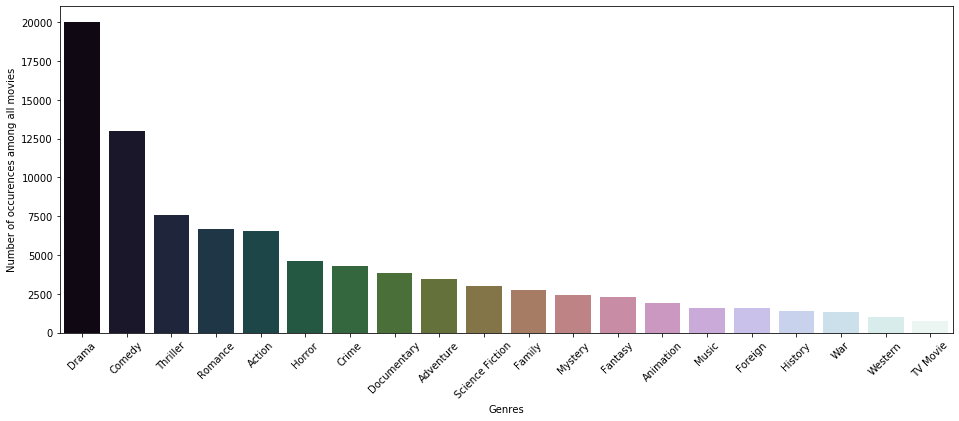

In [22]:
fig, ax = plt.subplots(figsize = (16, 6))
genres_palette = sns.color_palette('cubehelix', len(genres_name_unique))
g = sns.countplot(genres_name_stacked, ax = ax, order = genres_name_stacked.value_counts().index,
                 palette = genres_palette)
ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies')
_ = plt.xticks(rotation = 45)

In [23]:
# we add a column of genres per movie as a weight, the more the movie has popular genres, the higher 
# the total weight of the movie
# compute weights
genres_weight = genres_name_stacked.value_counts(normalize = True)
genres_name_weighted = genres_name.replace(genres_weight)
movies['genres_weight'] = genres_name_weighted.sum(axis = 1)

In [24]:
# we also add column with number of genres for each movie
genres_name = movies.filter(regex = 'genres_name_.*')
movies['genres_num'] = genres_name.count(axis = 1)
for i, c in movies['genres_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} genres'.format(c, i))

14257 movies have 1 genres
14322 movies have 2 genres
9487 movies have 3 genres
3349 movies have 4 genres
830 movies have 5 genres
154 movies have 6 genres
24 movies have 7 genres
3 movies have 8 genres


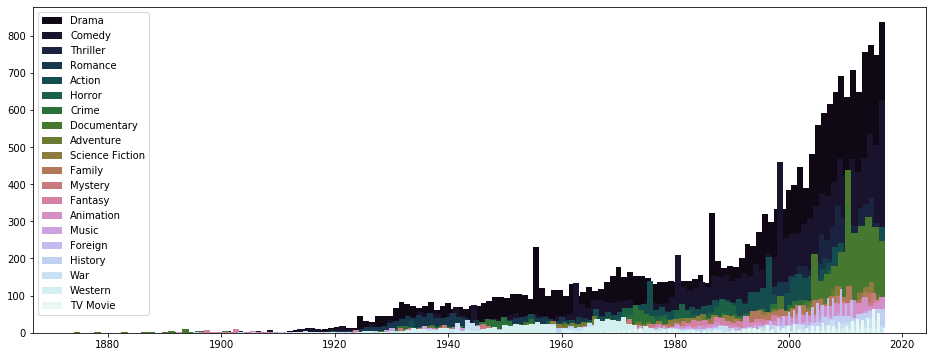

In [25]:
# plot some data on genres
fig, ax = plt.subplots(figsize = (16, 6))
genres_name_year = movies.filter(regex = '(genres_name_.*)|release_year') 
genres_name = movies.filter(regex = 'genres_name_.*')
for i, genre in enumerate(genres_name_stacked.value_counts().index):
    temp = genres_name_year[(genres_name_year[genres_name.columns] == genre).any(axis = 1)]
    ax.hist(temp['release_year'], 120, stacked = True, color = genres_palette[i], label = genre)
_ = plt.legend()

<font size="3">We observe that all genres have gained popularity over the years except maybe War and Western genres which have decreased and had a peak of popularity after World War 2. We also see that simply more movies are being produced as time increase.</font>

## Analysis of production companies

In [26]:
# we can drop the id of production companies and re-econde later
company_id = movies.filter(regex = 'production_companies_id_.*')
movies = movies.drop(columns = company_id.columns)

In [27]:
# identify movies without a production company
nulls = movies.filter(regex = 'production_companies_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production company. Can we drop them?'.format(nulls[0]))

There are 9473 movies without a production company. Can we drop them?


In [28]:
# let's see how many production companies movies have on average
company_name = movies.filter(regex = 'production_companies_name_.*')
avg_company = company_name.count(axis = 1).mean()
print('Number of production companies on average over all movies: {}'.format(avg_company))

Number of production companies on average over all movies: 1.6369914674963466


In [29]:
# we identify all possible values for production companies
company_name = movies.filter(regex = 'production_companies_name_.*')
company_name_stacked = company_name.stack().reset_index(drop = True)
company_name_unique = company_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production companies!'.format(len(company_name_unique)))

There are 23227 different production companies!


In [30]:
# get most popular production companies
num_most_popular = 30
print('{} most popular production companies (values: produced films)'.format(num_most_popular))
pd.DataFrame(company_name_stacked.value_counts()[:num_most_popular])

30 most popular production companies (values: produced films)


,0
Warner Bros.,1245
Metro-Goldwyn-Mayer (MGM),1070
Paramount Pictures,992
Twentieth Century Fox Film Corporation,828
Universal Pictures,827
Columbia Pictures Corporation,447
Canal+,433
Columbia Pictures,429
RKO Radio Pictures,290
New Line Cinema,276


<font size="3">We see that some companies appear two times (Walt Disney Productions and Walt Disney Pictures). Is this a rebranding factor or really two studios? Moreover, we saw that Pixar Animation Studios appeared in the beginning of the EDA. They are now a subsidiary of Walt Disney Studios and were part of Lucas Film in the past (which is also now part of Walt Disney). We are not more informed on how production companies are counted for each movie over the time horizon.</font>

[Text(0, 0.5, 'Number of occurences among all movies'),
 Text(0.5, 0, 'Genres'),
 Text(0.5, 1.0, 'Arte')]

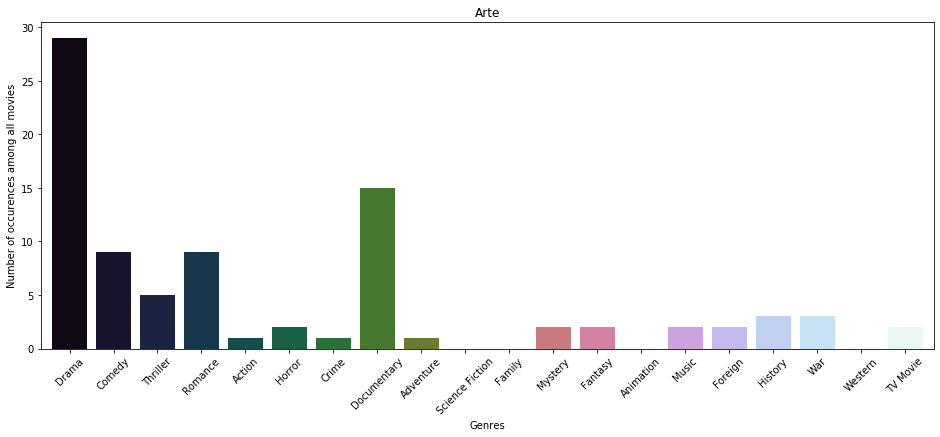

In [132]:
# plot some data on production companies (change company index)
fig, ax = plt.subplots(figsize = (16, 6))
company_index = 0
this_company = company_name_stacked.value_counts().index[97]
genres_company = movies.filter(regex = '(genres_name_.*)|(production_companies_name_.*)')
company_name = movies.filter(regex = 'production_companies_name_.*')
genres_name = movies.filter(regex = 'genres_name_.*')
genres_this_company = genres_company[(genres_company[company_name.columns] == this_company).any(axis = 1)]
genres_this_company = genres_this_company[genres_name.columns]
genres_count = pd.Series(index = genres_name_stacked.value_counts().index, data = 0)
for col in genres_this_company:
    temp = genres_this_company[col].value_counts()
    genres_count = pd.concat([genres_count, temp], axis = 1)
genres_count = genres_count.sum(axis = 1)
genres_count.plot.bar(genres_count, ax = ax, color = genres_palette, rot = 45, width = 0.8)
ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies', title = this_company)

<font size="3">The most popular companies seems to follow the general trend, which is normal since they are the ones to create the trend. Production companies such as Arte (around index 100) is an outlier of the trend with noticeable amount of documenaries.</font>

In [32]:
# we add column with number of production companies for each movie
company_name = movies.filter(regex = 'production_companies_name_.*')
movies['production_companies_num'] = company_name.count(axis = 1)

In [33]:
# print some interesting information
max_company = movies[movies['production_companies_num'] == movies['production_companies_num'].max()]
print('There are {} movies with {} production companies!'.format(len(max_company), 
                                                                 movies['production_companies_num'].max()))
max_company

There are 3 movies with 26 production companies!


,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_name_0,genres_name_1,genres_name_2,genres_name_3,genres_name_4,genres_name_5,genres_name_6,genres_name_7,production_companies_name_0,production_companies_name_1,production_companies_name_2,production_companies_name_3,production_companies_name_4,production_companies_name_5,production_companies_name_6,production_companies_name_7,production_companies_name_8,production_companies_name_9,production_companies_name_10,production_companies_name_11,production_companies_name_12,production_companies_name_13,production_companies_name_14,production_companies_name_15,production_companies_name_16,production_companies_name_17,production_companies_name_18,production_companies_name_19,production_companies_name_20,production_companies_name_21,production_companies_name_22,production_companies_name_23,production_companies_name_24,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1_11,spoken_languages_name_11,spoken_languages_iso_639_1_12,spoken_languages_name_12,spoken_languages_iso_639_1_13,spoken_languages_name_13,spoken_languages_iso_639_1_14,spoken_languages_name_14,spoken_languages_iso_639_1_15,spoken_languages_name_15,spoken_languages_iso_639_1_16,spoken_languages_name_16,spoken_languages_iso_639_1_17,spoken_languages_name_17,spoken_languages_iso_639_1_18,spoken_languages_name_18,release_year,release_month,genres_weight,genres_num,production_companies_num
3786,0,12800000.0,16,168629,en,Dancer in the Dark,10.684806,40031879.0,140.0,Dancer in the Dark,0,7.7,392.0,498,Heart of Gold Collection,Drama,Crime,Music,NaN,NaN,NaN,NaN,NaN,Fine Line Features,Zentropa Entertainments,Danmarks Radio (DR),SVT Drama,Arte,Memfis Film,France 3 Cinéma,Angel fi

<font size="3">These movies seem to be European collaborations that group various countries and various production companies.</font>

## Analysis of production countries

In [34]:
# we can drop the iso certification name of production countries and re-econde later
country_iso = movies.filter(regex = 'production_countries_iso_.*')
movies = movies.drop(columns = country_iso.columns)

In [35]:
# identify movies without a production country
nulls = movies.filter(regex = 'production_countries_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production country. Can we can drop them?'.format(nulls[0]))

There are 4522 movies without a production country. Can we can drop them?


In [36]:
# let's see how many production countries movies have on average
country_name = movies.filter(regex = 'production_countries_name_.*')
avg_country = country_name.count(axis = 1).mean()
print('Number of production countries on average over all movies: {}'.format(avg_country))

Number of production countries on average over all movies: 1.1290953660491208


In [37]:
# we identify all possible values for production countries
country_name = movies.filter(regex = 'production_countries_name_.*')
country_name_stacked = country_name.stack().reset_index(drop = True)
country_name_unique = country_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production countries!'.format(len(country_name_unique)))

There are 157 different production countries!


In [94]:
# get most popular production countries
num_most_popular = 10
print('{} most popular production countries (values: produced films)'.format(num_most_popular))
country_name_value_counts = country_name_stacked.value_counts()
country_name_value_counts_norm = country_name_stacked.value_counts()/sum(country_name_value_counts)
pd.DataFrame(country_name_value_counts[:num_most_popular])

10 most popular production countries (values: produced films)


,0
United States of America,20784
United Kingdom,4022
France,3803
Germany,2168
Italy,2025
Canada,1710
Japan,1578
Spain,910
Russia,871
India,791


<font size="3">As one could guess, the biggest producers of movies are the USA, UK, and France, among other big nations. </font>

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


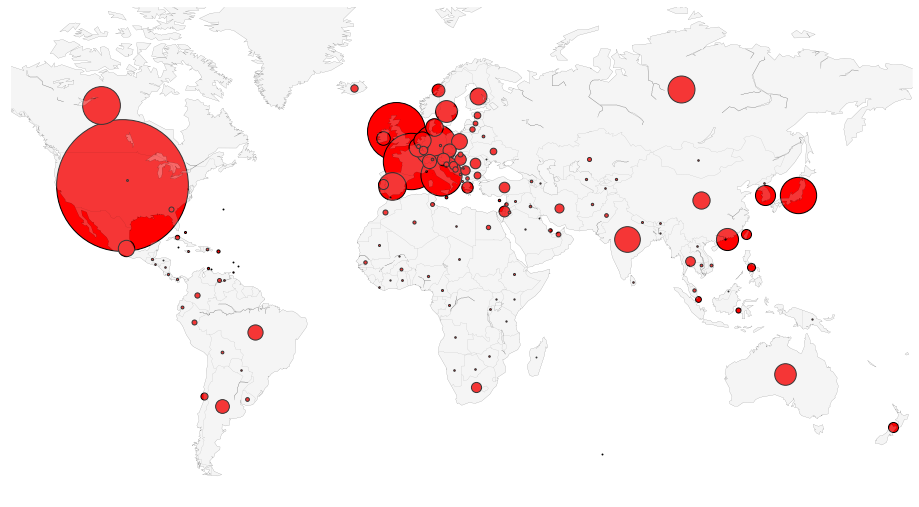

In [187]:
# plot map with number of movies produced
fig, ax = plt.subplots(figsize = (18, 9))
m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read gps coordinates first
with open('gps_coordinates.json') as f:
    gps_coordinates = json.load(f)

# get gps coordinates of countries
geolocator = Nominatim(user_agent = 'specify_your_app_name_here', timeout = 10)
for country in country_name_value_counts[:160].index:
    if country in gps_coordinates:
        x, y = gps_coordinates[country]
    else:
        location = geolocator.geocode(country)
        try:
            coordinates = (location.latitude, location.longitude)
            x, y = m(coordinates[1], coordinates[0])
            gps_coordinates[country] = (x, y)
        except: # if the country does not exist?
            continue
    
    plt.scatter(x, y, color = 'red', s = country_name_value_counts_norm[country]*4e4, 
                alpha = 1, marker = 'o', linewidth = 1, edgecolors = 'black')
    
# write gps coordinates
with open('gps_coordinates.json', 'w') as f:
    json.dump(gps_coordinates, f)

<font size="3">We continue inspecting the last columns which have multiple possibilities</font>

<font size="3">We choose to leave the other columns as they are since not having a production company or not having a production country is not problematic for the moment.</font>